In [52]:
import pandas as StkMakTwt_ss
import nltk as StkMakTwt_kk
from nltk.corpus import stopwords as StkMakTwt_dd
import re as StkMakTwt_ee

In [53]:
StkMakTwt_Dataset = StkMakTwt_ss.read_csv('tweets_labelled_09042020_16072020.csv', sep=';', on_bad_lines='skip')
StkMakTwt_Dataset.shape

(5000, 4)

In [54]:
StkMakTwt_Dataset.head(n=10) #head contents

,id,created_at,text,sentiment
0,77522,2020-04-15 01:03:46+00:00,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",positive
1,661634,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative
2,413231,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,positive
3,760262,2020-07-03 19:39:35+00:00,RT @bentboolean: How much of Amazon's traffic ...,positive
4,830153,2020-07-09 14:39:14+00:00,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive
5,27027,2020-04-12 21:52:56+00:00,RT @QuantTrend: Reduce your portfolio RISK! GO...,positive
6,472959,2020-06-09 05:23:06+00:00,$863.69 Million in Sales Expected for Spirit A...,positive
7,392845,2020-06-02 01:12:29+00:00,RT @ArjunKharpal: #Apple has cut the prices of...,negative
8,313771,2020-05-07 04:58:41+00:00,RT @SMA_alpha: The #CDC U.S. New Case data has...,negative
9,267894,2020-05-04 15:16:29+00:00,Where to Look for Dependable Dividends\nRead M...,neutral


In [55]:
StkMakTwt_Dataset.tail(n=10) #tail contents

,id,created_at,text,sentiment
4990,580427,2020-06-19 17:57:42+00:00,RT @HedgehogTrader: HHT's Venture/Microcap Sto...,NaN
4991,762997,2020-07-03 13:03:28+00:00,$FB This didn’t get much playtime this week. I...,NaN
4992,692380,2020-06-28 14:12:19+00:00,@willschoebs Connecting two of your excellent ...,NaN
4993,766908,2020-07-04 22:10:27+00:00,Your ordinary person would focus on buying pur...,NaN
4994,592492,2020-06-20 20:34:07+00:00,"RT @smtraderCA: ""Is A Big Moving Coming?"" for ...",NaN
4995,411380,2020-06-04 18:14:57+00:00,"With ad revenues falling, what’s the impact on...",NaN
4996,62318,2020-04-14 02:15:01+00:00,RT @KelvinSCWong: Well another point to add to...,NaN
4997,627230,2020-06-23 14:08:15+00:00,$ITOX working on a contract with a fortune 500...,NaN
4998,890123,2020-07-14 23:18:34+00:00,"$DIS it could break the 120 pin, then 125&gt; ...",NaN
4999,301411,2020-05-06 04:22:19+00:00,Amedisys Inc $AMED COO Christopher Gerard Sell...,NaN


In [56]:
StkMakTwt_Dataset['text'][20:40]

20    RT @RafKadian: $tsla &amp; $nio fot the day #t...
21    Q1 2020 EPS Estimates for Merck &amp; Co., Inc...
22    RT @JohriNikhil: 3 of 8 #banks that infused co...
23    RT @Reveretrading: As promised, June 17 Plan\n...
24    8911.....IT IS THE BEST TIME TO COVER YOUR SHO...
25    RT @FreeShyloNow: GM #Shylobots 🤖 🌄☕\n\n3202🎯 ...
26    There are cases where investing in a taxable a...
27    #OfficeSupply orders up significantly as #USA ...
28    #stocks making it too easy at times.  #Options...
29    $T  Jul 14    \n- Daily stock market timing fo...
30    RT @leadlagreport: Several large corporations ...
31                      $AMZN nice little coiling here.
32    TOS frozen for anyone else?\n\n#es_f $spx $spy...
33    #NASDAQ E-mini #Futures #NQ_F  ⬆️ 77.25 Points...
34    Tenaris $TS Stock Rating Upgraded by Goldman S...
35    RT @ThePitBoss16: Google Stock Soars Near 10% ...
36    DYK that on May 22 2020 $UONE was trading at $...
37    https://t.co/Pj9Gu287hf\n$MA, $SAM   to In

In [57]:


del StkMakTwt_Dataset['created_at']
del StkMakTwt_Dataset['id']

In [58]:
StkMakTwt_Dataset.isnull().sum()

text            0
sentiment    3700
dtype: int64

In [59]:
# null data only present in 'sentiment' column
StkMakTwt_Dataset = StkMakTwt_Dataset.dropna(axis=0, subset=['sentiment'])

In [60]:
print("the total length of duplicates rows in stock tweet data: ", len(StkMakTwt_Dataset[StkMakTwt_Dataset.duplicated()]))

the total length of duplicates rows in stock tweet data:  14


In [61]:
StkMakTwt_Dataset=StkMakTwt_Dataset.drop_duplicates(subset=None, keep="first", inplace=False)

In [62]:
StkMakTwt_Dataset.shape

(1286, 2)

In [63]:
StkMakTwt_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1286 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1286 non-null   object
 1   sentiment  1286 non-null   object
dtypes: object(2)
memory usage: 30.1+ KB


In [64]:

StkMakTwt_Dataset['sentiment'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [65]:
StkMakTwt_Dataset['sentiment'].value_counts()

sentiment
positive    523
neutral     421
negative    342
Name: count, dtype: int64

In [66]:
import warnings as StkMakTwt_wwng
StkMakTwt_wwng.filterwarnings('ignore')
import matplotlib.pyplot as StkMakTwt_mplt
import seaborn as StkMakTwt_sbrn

<Axes: title={'center': 'Stock Market Tweets category'}>

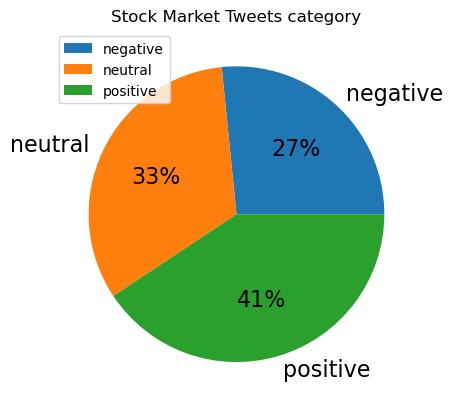

In [67]:

StkMakTwt_Dataset.groupby('sentiment').size().plot(title='Stock Market Tweets category', fontsize=16, kind='pie', legend=True, autopct='%1.0f%%')

41% of stock tweets are positive sentiments.

Text(0.5, 1.0, 'Stock Sentiment Tweets Target')

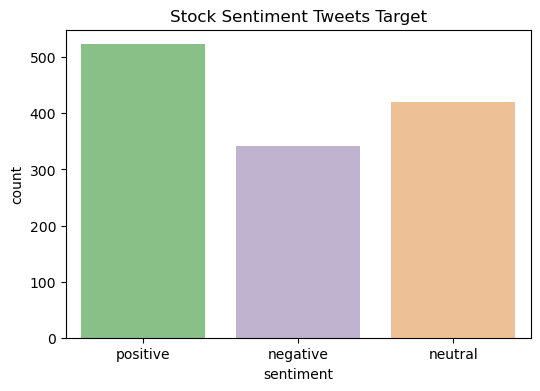

In [68]:
# count plot for the stock sentiment target
StkMakTwt_mplt.figure(figsize=(6, 4))
StkMakTwt_sbrn.countplot(x='sentiment', data=StkMakTwt_Dataset, palette="Accent")
StkMakTwt_mplt.title('Stock Sentiment Tweets Target')

In [69]:
StkMakTwt_Dataset

,text,sentiment
0,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",positive
1,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative
2,Net issuance increases to fund fiscal programs...,positive
3,RT @bentboolean: How much of Amazon's traffic ...,positive
4,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive
...,...,...
1295,#stocks back from the recovery room: https://t...,positive
1296,RT @MacroCharts: Breadth – expanding last week...,positive
1297,RT @MawsonResource: Rompas-Rajapalot: A Big Ne...,neutral
1298,$AAPL $QQQ Top may now be in. https://t.co/iNK...,positive


In [70]:

# Download stopwords once
StkMakTwt_kk.download('stopwords')

StkMakTwt_ddd = set(StkMakTwt_dd.words('english'))

def clean_text(StkMakTwt_T):
    StkMakTwt_T = StkMakTwt_T.lower()    
    StkMakTwt_T = StkMakTwt_ee.sub(r'\brt\b', '', StkMakTwt_T)    
    StkMakTwt_T = StkMakTwt_ee.sub(r'[^a-zA-Z\s]', '', StkMakTwt_T)    
    StkMakTwt_T = ' '.join([word for word in StkMakTwt_T.split() if word not in StkMakTwt_ddd]) 
    return StkMakTwt_T

StkMakTwt_Dataset['text'] = StkMakTwt_Dataset['text'].apply(clean_text)
StkMakTwt_Dataset['text'] 

[nltk_data] Downloading package stopwords to /Users/rahul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       robertbeadles yo enter win monarch tokens us s...
1       srilanka surcharge fuel removed surcharge rs i...
2       net issuance increases fund fiscal programs gt...
3       bentboolean much amazons traffic served fastly...
4       amd ryzen desktop cpus looking great track lau...
                              ...                        
1295    stocks back recovery room httpstcohvvlwwodu fa...
1296    macrocharts breadth expanding last weeks discu...
1297    mawsonresource rompasrajapalot big new camp ra...
1298                   aapl qqq top may httpstcoinkwbtxus
1299    glg partners lp short position hilton food gro...
Name: text, Length: 1286, dtype: object

In [71]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


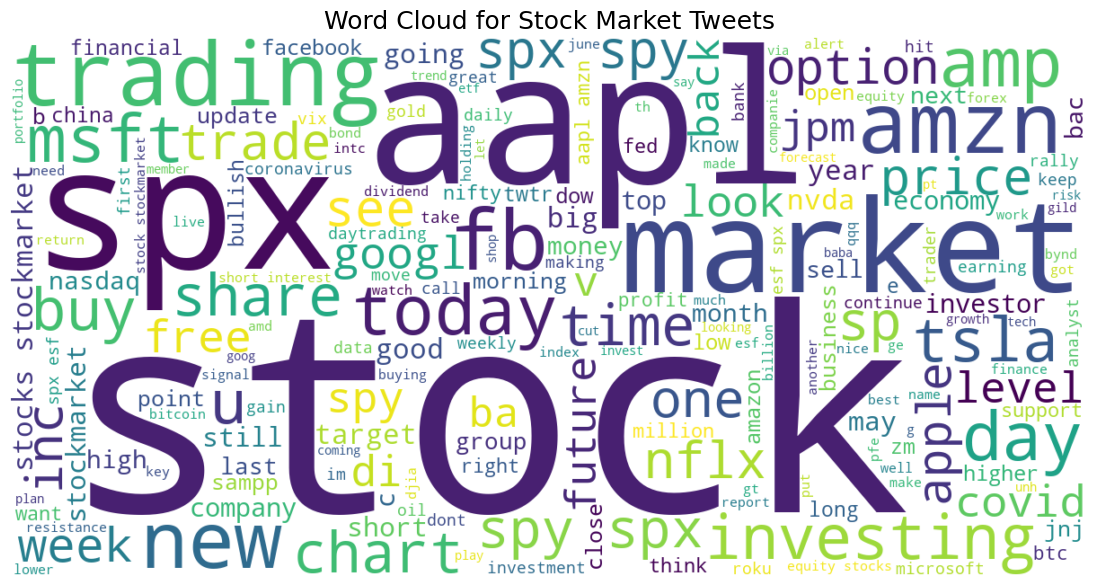

In [72]:
from wordcloud import WordCloud as StkMakTwt_wordcloud

# Combine cleaned text into one big string
StkMakTwt_text = " ".join(StkMakTwt_Dataset['text'])

# Creating WordCloud object
StkMakTwt_wc = StkMakTwt_wordcloud(width=1200, height=600, background_color='white', colormap='viridis',
    max_words=200,random_state=42).generate(StkMakTwt_text)

StkMakTwt_mplt.figure(figsize=(14,7))
StkMakTwt_mplt.imshow(StkMakTwt_wc, interpolation='bilinear')
StkMakTwt_mplt.axis('off')
StkMakTwt_mplt.title("Word Cloud for Stock Market Tweets", fontsize=18)
StkMakTwt_mplt.show()

StkMakTwt_wc.to_file("wordcloud_all_tweets.png")


In [73]:
from sklearn import preprocessing as StkMakTwt_gg

StkMakTwt_ggg = StkMakTwt_gg.LabelEncoder()

StkMakTwt_Dataset['sentiment']= StkMakTwt_ggg.fit_transform(StkMakTwt_Dataset['sentiment'])

StkMakTwt_Dataset['sentiment'].value_counts()

sentiment
2    523
1    421
0    342
Name: count, dtype: int64

sentiment
positive	denotes 2
neutral	denotes 1
negative	denotes 0


In [74]:
print(StkMakTwt_Dataset[:3])

StkMakTwt_Dataset.to_csv('stock_tweets_updated.csv', index=False)

                                                text  sentiment
0  robertbeadles yo enter win monarch tokens us s...          2
1  srilanka surcharge fuel removed surcharge rs i...          0
2  net issuance increases fund fiscal programs gt...          2
